In [1]:
from pathlib import Path, PurePath
import os
import sys
import json
from multiprocessing import Pool
import re

#sys.path.insert(0, "/Users/lfu/Documents/SWING/Script/DropMotion")
#from PlotFunctions import *
import itertools as it
import platform
import time
import logging
import cv2

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.signal as signal
from scipy.stats import sem
import math
# from lmfit import minimize, Parameters, Parameter, report_fit, models

import plotly.express as px
# import plotly
# plotly.offline.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
# plt.ioff()
#from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
from bokeh.palettes import d3
colors = d3["Category20"][20]
colors = ['#00A2A2', '#FF7577', '#0075F9', '#BC6852', '#1192FA', '#00AEAE']
# colors = viridis(6)

import matplotlib.pyplot as plt
# plt.style.use('gadfly')
#plt.style.use('seaborn-paper')
#plt.style.use('ggplot')
#plt.style.use('seaborn-deep')
from matplotlib import rcParams
rcParams['font.family'] = "serif"
rcParams['font.serif'] = 'Georgia'
rcParams['font.size'] = 20
rcParams['mathtext.fontset'] = 'stix'
rcParams["figure.dpi"] = 100
# os.chdir('/Users/lfu/Documents/IBRID/0_Script/cart_pole/q_learning/Figure')

In [2]:
# path = Path('/Users/lfu/Alienware/cart_pole/q_learning/0616_194025')
path = Path('/home/robotfish/Project/cart_pole/q_learning/1026_172009/results/1026_172010')
csvfiles = list(path.glob('**/ql_*.csv'))
file = csvfiles[0]

In [24]:
df = pd.read_csv(file, index_col=0)

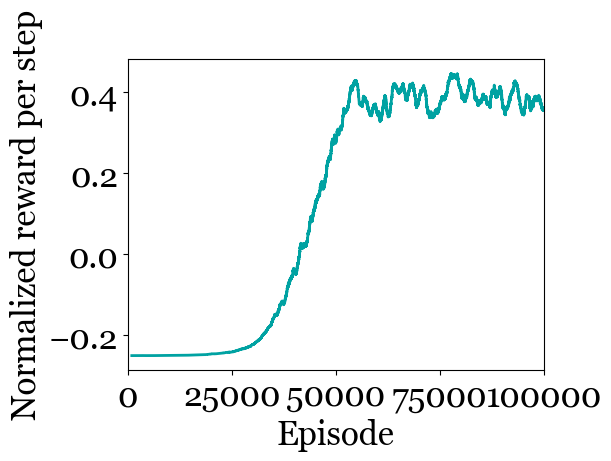

In [6]:
fig, (ax) = plt.subplots(1,1, figsize=(6, 4), tight_layout=False, sharex=True, constrained_layout=True)
x = df.index
y_tmp = df.reward.rolling(1000).mean()
y = y_tmp/1600
ax.plot(x, y, c=colors[0], label="center of mass", lw=2)
ax.set_ylabel(r'Normalized reward per step')
ax.set_xlabel(r'Episode')
ax.set_xlim(0, 100000)
plt.savefig('Fig_qlearning_reward.pdf', dpi=300, format='pdf')


In [10]:
y[-10000:].mean()

0.3785134942954066

In [25]:
df2 = pd.read_csv('/Users/lfu/Alienware/cart_pole/q_learning/0616_194025/100000_ep.csv', index_col = 0)

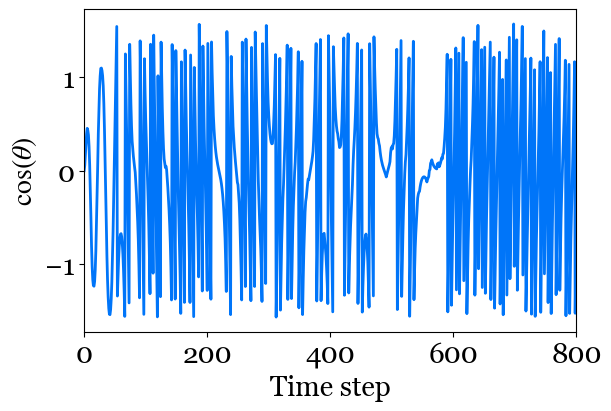

In [26]:
fig, (ax) = plt.subplots(1,1, figsize=(6, 4), tight_layout=False, sharex=True, constrained_layout=True)
x = df2.index
cos = df2.costheta
sin = df2.sintheta
tan = sin/cos
angle = np.arctan(tan)

ax.plot(x, angle, c=colors[2], label="center of mass", lw=2)
ax.set_ylabel(r'$\cos(\theta)$')
ax.set_xlabel(r'Time step')
ax.set_xlim(0, 800)
plt.savefig('Fig_qlearning_inference.pdf', dpi=300, format='pdf')

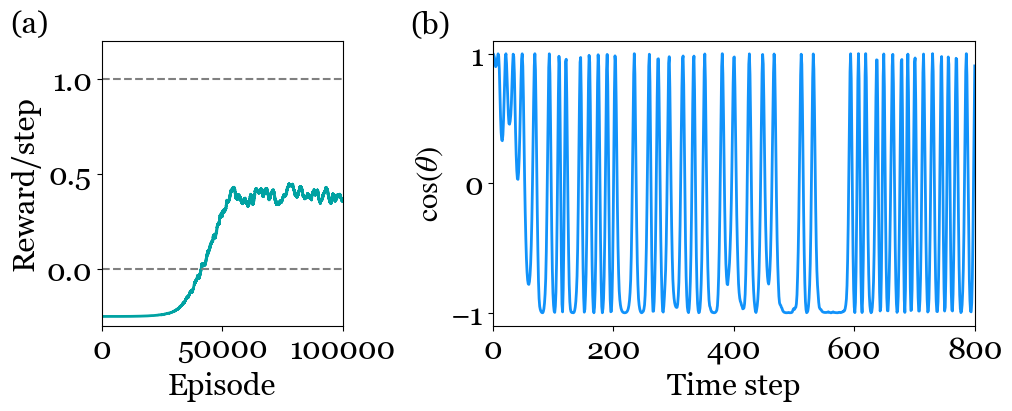

In [30]:
rcParams['font.size'] = 22
fig, (ax, ax1) = plt.subplots(1,2, figsize=(10, 4), gridspec_kw = {'width_ratios':[1, 2]}, tight_layout=False,  constrained_layout=True)
x = df.index
y_tmp = df.reward.rolling(1000).mean()
y = y_tmp/1600
ax.plot(x, y, c=colors[0], label="", lw=2)
ax.set_ylabel(r'Reward/step')
ax.set_xlabel(r'Episode')
ax.set_xlim(0, 100000)
ax.ticklabel_format(axis="x", style="plain", scilimits=(0,0))
ax.set_ylim(-0.3, 1.2)
ax.axhline(y=0, linestyle='--', color='gray')
ax.axhline(y=1, linestyle='--', color='gray')
x1 = df2.index
y1 = df2.costheta
ax1.plot(x1, y1, c=colors[4], label="", lw=2)
ax1.set_ylabel(r'$\cos(\theta)$')
ax1.set_xlabel(r'Time step')
ax1.set_xlim(0, 800)
ax.set_title(r'(a)', fontsize=22, position=(-0.3, 0.0))
ax1.set_title(r'(b)', fontsize=22, position=(-0.13, 0.0))
plt.savefig('Fig_qlearning_reward_inference.pdf', dpi=300, format='pdf', bbox_inches='tight')

In [33]:
x

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
             99991,  99992,  99993,  99994,  99995,  99996,  99997,  99998,
             99999, 100000],
           dtype='int64', length=100001)

In [51]:
from bokeh.palettes import d3, viridis, brewer, mpl
colors = mpl['Plasma'][11]

In [52]:
colors

('#0C0786',
 '#40039C',
 '#6A00A7',
 '#8F0DA3',
 '#B02A8F',
 '#CA4678',
 '#E06461',
 '#F1824C',
 '#FCA635',
 '#FCCC25',
 '#EFF821')

In [12]:
cos = df2.costheta
sin = df2.sintheta
theta = math.atan2(sin, cos)

TypeError: cannot convert the series to <class 'float'>

In [14]:
theta = np.arctan2(sin, cos)
theta

0      0.000000
1      0.056447
2      0.165373
3      0.262894
4      0.396577
         ...   
796   -2.398997
797   -1.976207
798   -1.526494
799   -1.016691
800   -0.439130
Length: 801, dtype: float64

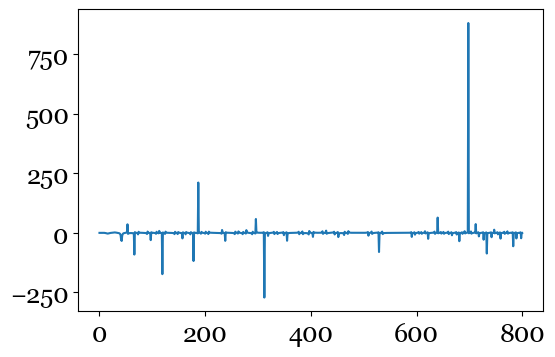

In [11]:
plt.plot(tan)

In [5]:
path = Path('/home/robotfish/Project/cart_pole/q_learning/1026_172009/results/1026_172010')
csvfiles = list(path.glob('**/ql_*.csv'))
file = csvfiles[0]
df = pd.read_csv(file)
df2 = pd.read_csv('/home/robotfish/Project/cart_pole/q_learning/1026_172009/results/1026_172010/100000_ep.csv', index_col = 0)

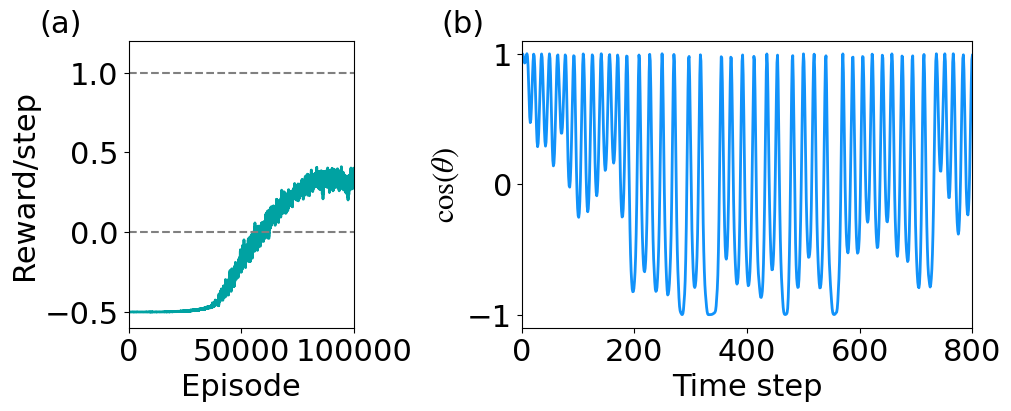

In [13]:
from matplotlib import rcParams
rcParams['font.family'] = "serif"
rcParams['font.serif'] = 'Georgia'
rcParams['font.size'] = 20
rcParams['mathtext.fontset'] = 'stix'
rcParams["figure.dpi"] = 100
rcParams['font.size'] = 22
fig, (ax, ax1) = plt.subplots(1,2, figsize=(10, 4), gridspec_kw = {'width_ratios':[1, 2]}, tight_layout=False,  constrained_layout=True)
x = df.index
y_tmp = df.reward.rolling(100).mean()
y = y_tmp/800
ax.plot(x, y, c=colors[0], label="", lw=2)
ax.set_ylabel(r'Reward/step')
ax.set_xlabel(r'Episode')
ax.set_xlim(0, 100000)
ax.ticklabel_format(axis="x", style="plain", scilimits=(0,0))
ax.set_ylim(-0.6, 1.2)
ax.axhline(y=0, linestyle='--', color='gray')
ax.axhline(y=1, linestyle='--', color='gray')
x1 = df2.index
y1 = df2.costheta
ax1.plot(x1, y1, c=colors[4], label="", lw=2)
ax1.set_ylabel(r'$\cos(\theta)$')
ax1.set_xlabel(r'Time step')
ax1.set_xlim(0, 800)
ax.set_title(r'(a)', fontsize=22, position=(-0.3, 0.0))
ax1.set_title(r'(b)', fontsize=22, position=(-0.13, 0.0))
plt.savefig('Fig_qlearning_reward_inference.pdf', dpi=300, format='pdf', bbox_inches='tight')

In [7]:
df

,Unnamed: 0,reward,episodeLength,eps,lastState
0,0,-400.365794,15,1.0,"(6, 9, 9, 4, 1)"
1,1,-400.539083,13,1.0,"(6, 9, 9, 4, 1)"
2,2,-401.003344,16,1.0,"(6, 9, 9, 4, 1)"
3,3,-394.542961,52,1.0,"(6, 9, 9, 4, 1)"
4,4,-401.077137,25,1.0,"(6, 9, 9, 4, 1)"
...,...,...,...,...,...
99996,99996,316.683404,800,0.1,"(6, 9, 9, 4, 1)"
99997,99997,371.879000,800,0.1,"(6, 9, 9, 4, 1)"
99998,99998,372.154444,800,0.1,"(6, 9, 9, 4, 1)"
99999,99999,337.635992,800,0.1,"(6, 9, 9, 4, 1)"


In [8]:
df['normalized_reward'] = df['reward']/800
df

,Unnamed: 0,reward,episodeLength,eps,lastState,normalized_reward
0,0,-400.365794,15,1.0,"(6, 9, 9, 4, 1)",-0.500457
1,1,-400.539083,13,1.0,"(6, 9, 9, 4, 1)",-0.500674
2,2,-401.003344,16,1.0,"(6, 9, 9, 4, 1)",-0.501254
3,3,-394.542961,52,1.0,"(6, 9, 9, 4, 1)",-0.493179
4,4,-401.077137,25,1.0,"(6, 9, 9, 4, 1)",-0.501346
...,...,...,...,...,...,...
99996,99996,316.683404,800,0.1,"(6, 9, 9, 4, 1)",0.395854
99997,99997,371.879000,800,0.1,"(6, 9, 9, 4, 1)",0.464849
99998,99998,372.154444,800,0.1,"(6, 9, 9, 4, 1)",0.465193
99999,99999,337.635992,800,0.1,"(6, 9, 9, 4, 1)",0.422045
